# Dynamic Trading Strategy Design

## Objective
Find a trading stratgy among semiconductor industry. Using three major companies in top 100 stocks (https://companiesmarketcap.com/): NVDA, TSM, AMD, I made a regression analysis to create trading signals at the best timing for buy and sell

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import yfinance as yf
import datetime

# Pair Trading

##  Import Data

In [61]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 8,31)

NVDA = yf.download('NVDA', start , end)
AMD = yf.download('AMD', start , end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [62]:
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,32.660000,34.619999,32.512501,34.055000,33.788902,50875200
2019-01-03,33.447498,33.790001,31.922501,31.997499,31.747471,70555200
2019-01-04,32.735001,34.432499,32.424999,34.047501,33.781460,58562000
2019-01-07,34.625000,36.222500,34.107498,35.849998,35.569878,70916000
2019-01-08,36.672501,36.695000,34.224998,34.957500,34.684334,78601600


In [63]:
AMD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,18.010000,19.000000,17.980000,18.830000,18.830000,87148700
2019-01-03,18.420000,18.680000,16.940001,17.049999,17.049999,117277600
2019-01-04,17.549999,19.070000,17.430000,19.000000,19.000000,111878600
2019-01-07,19.440001,20.680000,19.000000,20.570000,20.570000,107157000
2019-01-08,21.190001,21.200001,19.680000,20.750000,20.750000,121271000


In [64]:
NVDA = NVDA.reset_index()
NVDA = NVDA[['Date', 'Close']]
NVDA.columns = ['Date', 'NVDA']

AMD = AMD.reset_index()
AMD = AMD[['Date', 'Close']]
AMD.columns = ['Date', 'AMD']

In [65]:
pair_data = pd.merge(NVDA, AMD, on='Date')
pair_data.head()

,Date,NVDA,AMD
0,2019-01-02,34.055000,18.830000
1,2019-01-03,31.997499,17.049999
2,2019-01-04,34.047501,19.000000
3,2019-01-07,35.849998,20.570000
4,2019-01-08,34.957500,20.750000


### Correlation Between NVDA/AMD

In [66]:
NVDA_return = pair_data['NVDA'].pct_change()
AMD_return = pair_data['AMD'].pct_change()
NVDA_AMD_corr = NVDA_return.corr(AMD_return)
print('NVDA - AMD Correlation: ', NVDA_AMD_corr)

NVDA - AMD Correlation:  0.6654986317403395


### Price Comparison 

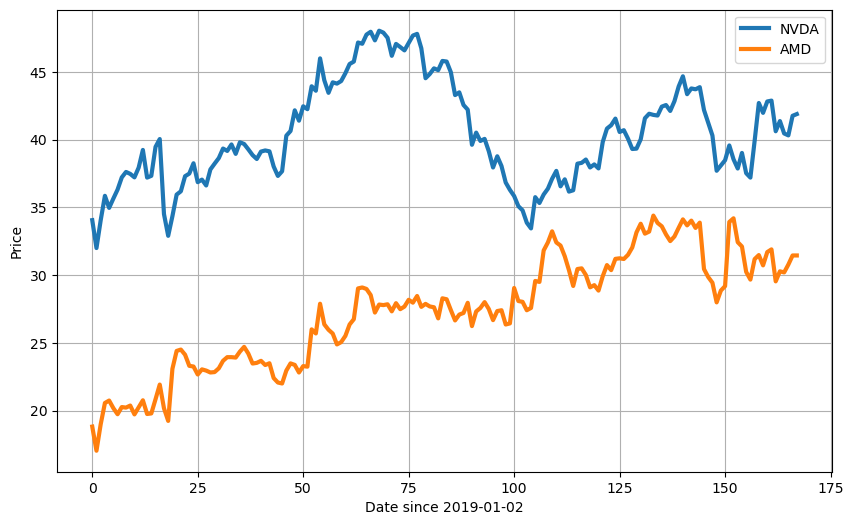

In [67]:
plt.figure(figsize=(10,6))
plt.plot(pair_data['NVDA'],linewidth=3,label='NVDA')
plt.plot(pair_data['AMD'],linewidth=3,label='AMD')
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.ylabel('Price')
plt.legend()

### Accumulating Return

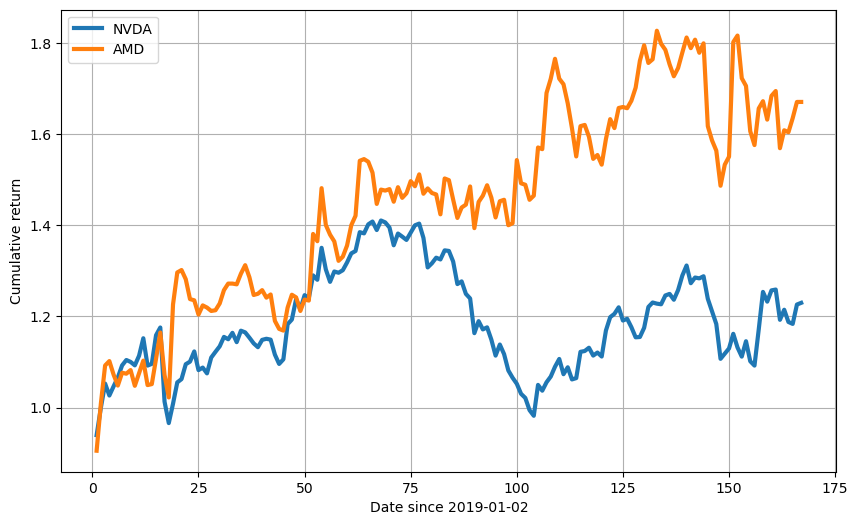

In [68]:
plt.figure(figsize=(10,6))
plt.plot((pair_data['NVDA'].pct_change()+1).cumprod(),linewidth=3,label='NVDA')
plt.plot((pair_data['AMD'].pct_change()+1).cumprod(),linewidth=3,label='AMD')
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.ylabel('Cumulative return')
plt.legend()

In [69]:
tickers = [ 'AMD', 'NVDA']

C:\Users\tim90\AppData\Local\Temp\ipykernel_20232\2067934971.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([str(pair_data['Date'][p])[:10] for p in pair_data[::len(pair_data)//9].index])


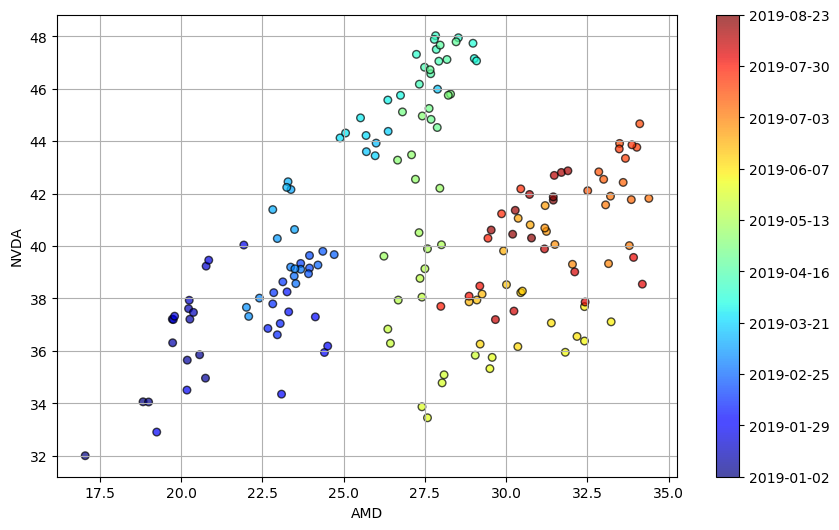

In [70]:
plt.figure(figsize=(10,6))
colors = np.linspace(0.1, 1, len(pair_data))
sc = plt.scatter(pair_data[tickers[0]], pair_data[tickers[1]], s=30, 
                 c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(pair_data['Date'][p])[:10] for p in pair_data[::len(pair_data)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1])
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

### OLS Linear Regression

In [71]:
x = sm.add_constant(pair_data[tickers[0]], prepend=False)
ols = sm.OLS(pair_data[tickers[1]], x).fit()
beta = ols.params
y_fit = [x.min().dot(beta), x.max().dot(beta)]

In [72]:
print(ols.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.107   
Dependent Variable: NVDA             AIC:                903.0446
Date:               2024-05-06 17:27 BIC:                909.2925
No. Observations:   168              Log-Likelihood:     -449.52 
Df Model:           1                F-statistic:        21.07   
Df Residuals:       166              Prob (F-statistic): 8.68e-06
R-squared:          0.113            Scale:              12.498  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
AMD        0.3023     0.0658    4.5907   0.0000    0.1723    0.4323
const     32.1317     1.8173   17.6807   0.0000   28.5436   35.7198
-----------------------------------------------------------------
Omnibus:              8.281        Durbin-Watson:           0.071
Prob(Omnibus):   

In [73]:
ols.params[0]

0.3022661712468009

In [74]:
beta = ols.params
beta

AMD       0.302266
const    32.131711
dtype: float64

C:\Users\tim90\AppData\Local\Temp\ipykernel_20232\3992719059.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels([str(pair_data['Date'][p])[:10] for p in pair_data[::len(pair_data)//9].index])


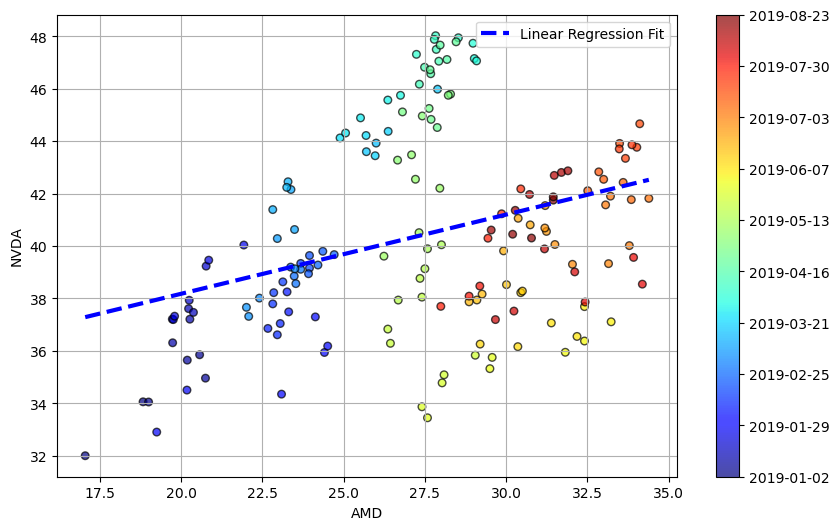

In [75]:
plt.figure(figsize=(10,6))
colors = np.linspace(0.1, 1, len(pair_data))
sc = plt.scatter(pair_data[tickers[0]], pair_data[tickers[1]], s=30, 
                 c=colors, cmap=plt.get_cmap('jet'), edgecolor='k', alpha=0.7)
plt.plot([x.min()[0], x.max()[0]], y_fit, '--b', linewidth=3, label='Linear Regression Fit')
plt.legend()

cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(pair_data['Date'][p])[:10] for p in pair_data[::len(pair_data)//9].index])
plt.xlabel(tickers[0])
plt.ylabel(tickers[1])
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

### Model the Spread

In [76]:
pair_spread = pd.DataFrame(pair_data[tickers[1]] - beta[0] * pair_data[tickers[0]] - beta[1])
pair_spread.columns = ['in-sample']
pair_spread['Date'] = pair_data['Date']

In [77]:
pair_spread.head()

,in-sample,Date
0,-3.768382,2019-01-02
1,-5.287849,2019-01-03
2,-3.827267,2019-01-04
3,-2.499327,2019-01-07
4,-3.446233,2019-01-08


Text(0.5, 1.0, 'NVDA - AMD Spread')

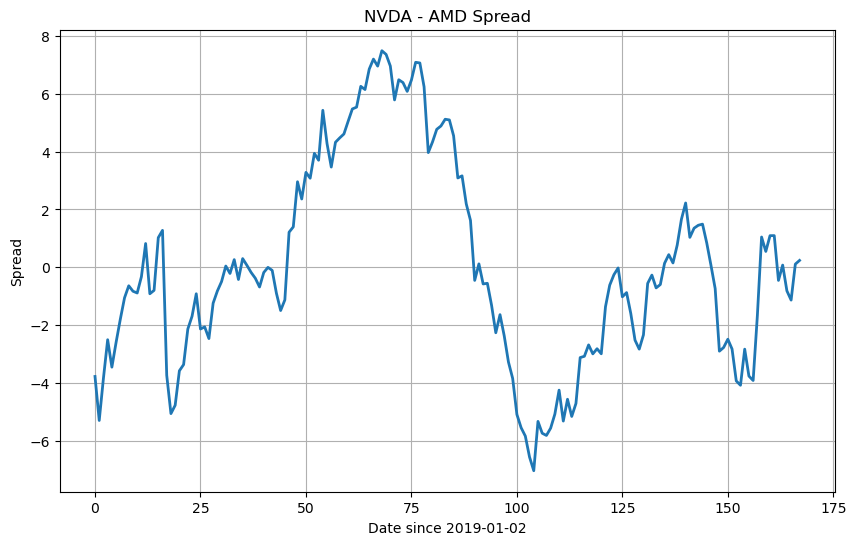

In [78]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.plot(pair_spread['in-sample'],linewidth=2)
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.ylabel('Spread')
plt.title('NVDA - AMD Spread')

In [79]:
pair_mean = pair_spread['in-sample'].mean()
pair_std = pair_spread['in-sample'].std()

# Find indices where spread crosses mean and mean ± std

pair_std_up = ((pair_spread['in-sample'].shift(1) < pair_mean + pair_std) & 
                (pair_spread['in-sample'] > pair_mean + pair_std))

# Crossing below mean - std_dev (potential buy signal)
pair_std_down = ((pair_spread['in-sample'].shift(1) > pair_mean - pair_std) & 
                  (pair_spread['in-sample'] < pair_mean - pair_std))

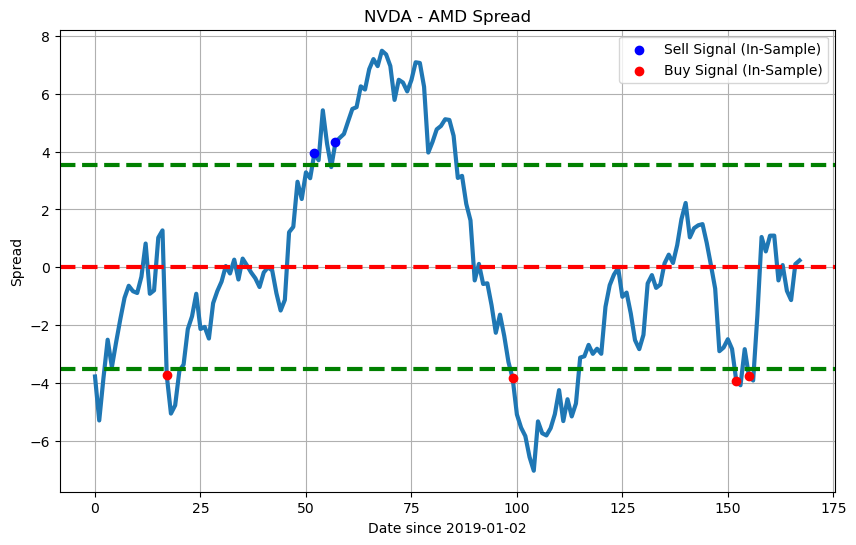

In [80]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.plot(pair_spread['in-sample'],linewidth=3)

plt.axhline(pair_spread['in-sample'].mean(), ls = '--', color='r',linewidth=3)
plt.axhline(pair_spread['in-sample'].mean() + pair_spread['in-sample'].std(), ls = '--', color='g',linewidth=3)
plt.axhline(pair_spread['in-sample'].mean() - pair_spread['in-sample'].std(), ls = '--', color='g',linewidth=3)

plt.scatter(pair_spread.index[pair_std_up], pair_spread['in-sample'][pair_std_up], color='blue', label='Sell Signal (In-Sample)', zorder=5)
plt.scatter(pair_spread.index[pair_std_down], pair_spread['in-sample'][pair_std_down], color='red', label='Buy Signal (In-Sample)', zorder=5)
plt.ylabel('Spread')
plt.title('NVDA - AMD Spread')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.legend()

### In-Sample Performance

In [81]:
pair_spread_test = pair_spread[pair_spread['Date'] <= '2019-03-31']
pair_spread_test.head()

,in-sample,Date
0,-3.768382,2019-01-02
1,-5.287849,2019-01-03
2,-3.827267,2019-01-04
3,-2.499327,2019-01-07
4,-3.446233,2019-01-08


In [82]:
# Assume the intital number of shares = 10
# One sell signal/buy signal indicates sell/buy 1 share
# The trading period is 3 months

# The trading signals
pair_sell_signal = pair_spread_test['in-sample'][pair_std_up].index  # selling signal
pair_buy_signal = pair_spread_test['in-sample'][pair_std_down].index # buying signal

# Acutal NVDA price 
pair_NVDA_sell = pair_data['NVDA'].iloc[pair_sell_signal]
pair_NVDA_sell = pair_NVDA_sell.to_numpy()

pair_NVDA_buy = pair_data['NVDA'].iloc[pair_buy_signal]
pair_NVDA_buy = pair_NVDA_buy.to_numpy()

# Beginning price of NVDA
pair_NVDA_beginning = pair_data['NVDA'].iloc[0]

# End price of NVDA
pair_NVDA_end = pair_data[pair_data['Date'] <= '2019-03-31']['NVDA'].iloc[-1]

# Calculate the return from 1/1 to 3/31
pair_return = 0
stock = 10

# buy stocks at buy sianl
if pair_NVDA_buy.size > 0:
    for i in pair_NVDA_buy:
        pair_return += pair_NVDA_beginning - i
        stock += 1

# sell stocks at sell signal
if pair_NVDA_sell.size > 0:
    for i in pair_NVDA_sell:
        pair_return += i - pair_NVDA_beginning
        stock -= 1
# clean the rest of the stocks to see the profit
pair_return += stock * (pair_NVDA_end - pair_NVDA_beginning)
print('In-Sample Pair Strategy Return: ', pair_return)
print('buy signal: ', pair_buy_signal.values)
print('sell signal: ', pair_sell_signal.values)
print('buy price: ', pair_NVDA_buy)
print('sell price: ', pair_NVDA_sell)

In-Sample Pair Strategy Return:  117.10249328613281
buy signal:  [17]
sell signal:  [52 57]
buy price:  [34.50249863]
sell price:  [43.92750168 44.21749878]


### Baseline (In-Sample)

In [83]:
print('In-Sample baseline Return: ', 10 * (pair_NVDA_end - pair_NVDA_beginning))

In-Sample baseline Return:  108.34999084472656


### Test Pair Trade Strategy (Out of Sample)

In [84]:
start_oos = datetime.datetime(2019, 9, 1)
end_oos = datetime.datetime(2019, 12,31)

NVDA_oos = yf.download('NVDA', start_oos , end_oos)
AMD_oos = yf.download('AMD', start_oos , end_oos)

NVDA_oos = NVDA_oos.reset_index()
NVDA_oos = NVDA_oos[['Date','Close']]
NVDA_oos.columns = ['Date','NVDA']

AMD_oos = AMD_oos.reset_index()
AMD_oos = AMD_oos[['Date','Close']]
AMD_oos.columns = ['Date','AMD']
pair_data_oos = pd.merge(NVDA_oos, AMD_oos, on='Date')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [85]:
spread_pair_oos = pair_data_oos[tickers[1]] - beta[0] * pair_data_oos[tickers[0]] - beta[1]
spread_pair_oos = pd.DataFrame(spread_pair_oos, columns = ['out-sample'])

In [86]:
spread_pair_oos_index = len(pair_spread) +np.cumsum(np.ones(spread_pair_oos.shape[0]))-1

In [87]:
# Reset pair_data_oos
pair_data_oos.index = spread_pair_oos_index

In [88]:
pair_oos_std_up = ((spread_pair_oos['out-sample'].shift(1) < pair_mean + pair_std) & 
                (spread_pair_oos['out-sample'] >= pair_mean + pair_std))

pair_oos_std_down = ((spread_pair_oos['out-sample'].shift(1) > pair_mean - pair_std) & 
                  (spread_pair_oos['out-sample'] <= pair_mean - pair_std))

Text(0.5, 0, 'Date since 2019-01-02')

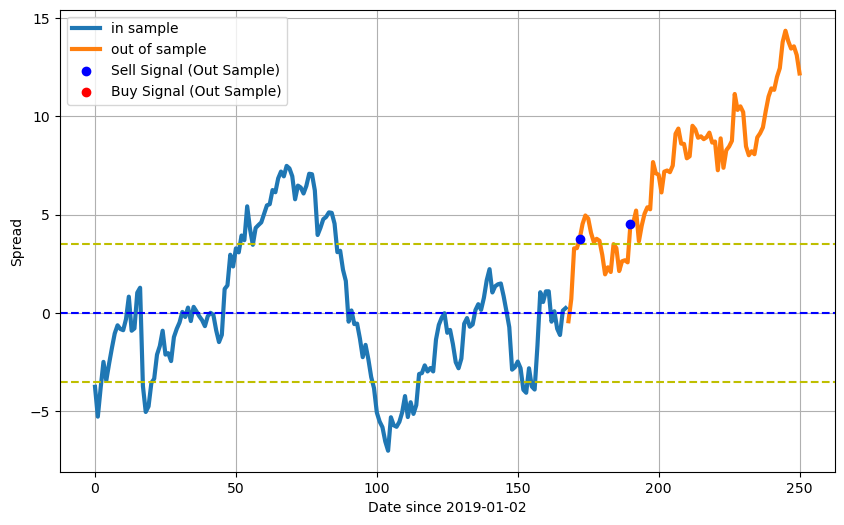

In [89]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.plot(pair_spread['in-sample'],linewidth=3,label='in sample')
plt.plot(spread_pair_oos_index, spread_pair_oos,label='out of sample',linewidth=3)

# Plot the mean and std lines
plt.axhline(pair_spread['in-sample'].mean(), ls = '--', color='b');
plt.axhline(pair_spread['in-sample'].mean() + pair_spread['in-sample'].std(), ls = '--', color='y');
plt.axhline(pair_spread['in-sample'].mean() - pair_spread['in-sample'].std(), ls = '--', color='y');

# Plot trading Singals
plt.scatter(spread_pair_oos_index[pair_oos_std_up], spread_pair_oos['out-sample'][pair_oos_std_up], color='blue', label='Sell Signal (Out Sample)', zorder=5)
plt.scatter(spread_pair_oos_index[pair_oos_std_down], spread_pair_oos['out-sample'][pair_oos_std_down], color='red', label='Buy Signal (Out Sample)', zorder=5)

plt.legend()
plt.ylabel('Spread')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])

### Out-Sample Performance

In [90]:
# Assume the intital number of shares = 10
# One sell signal/buy signal indicates sell/buy 1 share
# The trading period is 3 months

# The trading signals
pair_oos_sell_signal = spread_pair_oos_index[pair_oos_std_up] # selling signal
pair_oos_buy_signal = spread_pair_oos_index[pair_oos_std_down] # no buying signal


# Acutal NVDA price 
pair_oos_NVDA_sell = pair_data_oos['NVDA'][pair_oos_sell_signal]
pair_oos_NVDA_sell = pair_oos_NVDA_sell.to_numpy()

pair_oos_NVDA_buy = pair_data_oos['NVDA'][pair_oos_buy_signal]
pair_oos_NVDA_buy = pair_oos_NVDA_buy.to_numpy()

# Beginning price of NVDA
pair_oos_NVDA_beginning = pair_data_oos['NVDA'].iloc[0]

# End price of NVDA
pair_oos_NVDA_end = pair_data_oos['NVDA'].iloc[-1]

# Calculate the return from 9/1 to 12/31
pair_oos_return = 0
stock = 10

# Sell stocks
if pair_oos_NVDA_sell.size > 0:
    for i in pair_oos_NVDA_sell:
        pair_oos_return += i - pair_oos_NVDA_beginning
        stock -= 1
# Buy stocks
if pair_oos_NVDA_buy.size > 0:
    for i in pair_oos_NVDA_buy:
        pair_oos_return += pair_oos_NVDA_beginning - i
        stock += 1

pair_oos_return += stock * (pair_oos_NVDA_end - pair_oos_NVDA_beginning)
print('Out-Sample Pair Strategy Return: ', pair_oos_return)
print('buy signal: ', pair_oos_buy_signal)
print('sell signal: ', pair_oos_sell_signal)
print('buy price: ', pair_oos_NVDA_buy)
print('sell price: ', pair_oos_NVDA_sell)

Out-Sample Pair Strategy Return:  144.66751861572266
buy signal:  []
sell signal:  [172. 190.]
buy price:  []
sell price:  [45.125      45.32749939]


### Baseline (Out-Sample)

In [91]:
print('out-Sample baseline Return: ', 10 * (pair_oos_NVDA_end - pair_oos_NVDA_beginning))

out-Sample baseline Return:  170.3750228881836


# Extended Pair Trading

### Import Addtional Stock

In [92]:
TSM = yf.download('TSM', start , end)

[*********************100%%**********************]  1 of 1 completed


In [93]:
TSM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,36.200001,36.750000,36.000000,36.520000,31.976454,5273100
2019-01-03,35.340000,35.520000,34.270000,34.360001,30.085194,15998000
2019-01-04,34.459999,35.029999,34.209999,34.970001,30.619291,14178200
2019-01-07,35.009998,35.470001,34.970001,35.230000,30.846943,6850800
2019-01-08,35.110001,35.180000,34.639999,34.939999,30.593025,11462600


In [94]:
TSM = TSM.reset_index()
TSM = TSM[['Date', 'Close']]
TSM.columns = ['Date', 'TSM']

In [95]:
combined_data = pd.merge(pair_data, TSM, on='Date')
combined_data.head()

,Date,NVDA,AMD,TSM
0,2019-01-02,34.055000,18.830000,36.520000
1,2019-01-03,31.997499,17.049999,34.360001
2,2019-01-04,34.047501,19.000000,34.970001
3,2019-01-07,35.849998,20.570000,35.230000
4,2019-01-08,34.957500,20.750000,34.939999


### Correlation Between NVDA/TSM and AMD/TSM

In [96]:
TSM_return = combined_data['TSM'].pct_change()
NVDA_TSM_corr = NVDA_return.corr(TSM_return)
print('NVDA - TSM correlation: ', NVDA_TSM_corr)

NVDA - TSM correlation:  0.628569839530711


In [97]:
AMD_TSM_corr = AMD_return.corr(TSM_return)
print('AMD - TSM correlation: ', AMD_TSM_corr)

AMD - TSM correlation:  0.4901104645655085


### Price Comparison

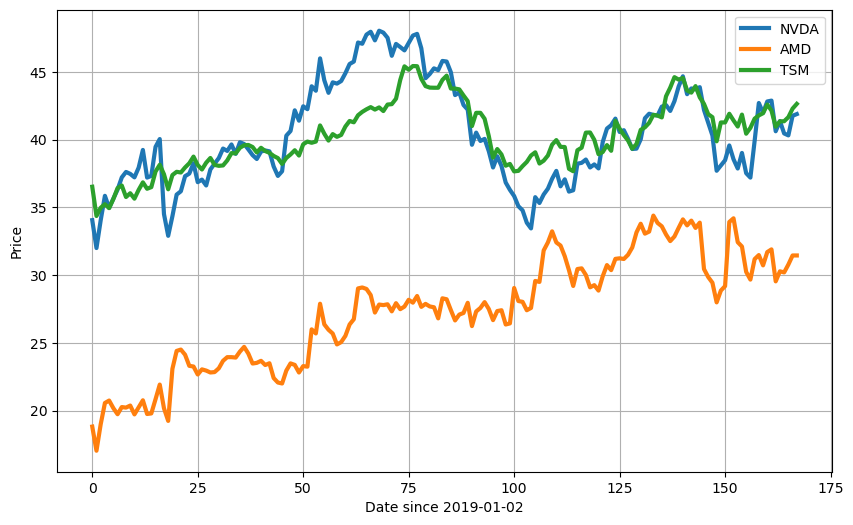

In [98]:
plt.figure(figsize=(10,6))
plt.plot(combined_data['NVDA'],linewidth=3,label='NVDA')
plt.plot(combined_data['AMD'],linewidth=3,label='AMD')
plt.plot(combined_data['TSM'],linewidth=3,label='TSM')
plt.plot()
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.ylabel('Price')
plt.legend()

### Accumulating Return

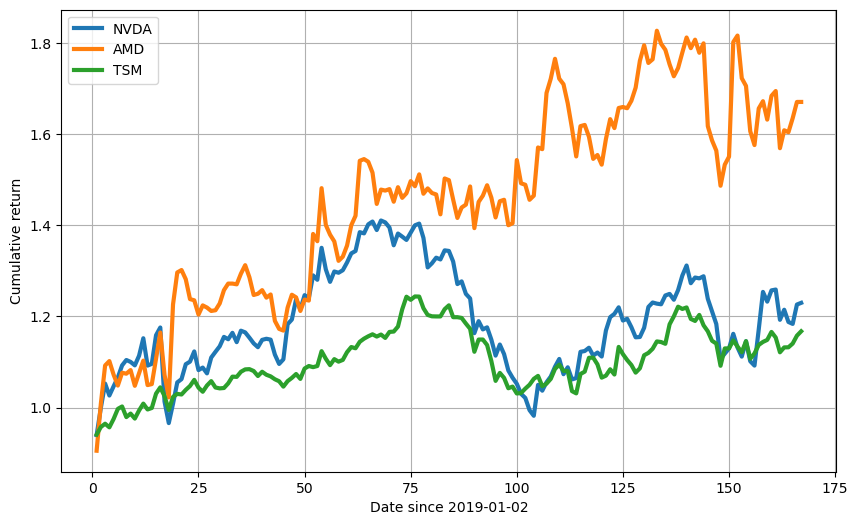

In [99]:
plt.figure(figsize=(10,6))
plt.plot((combined_data['NVDA'].pct_change()+1).cumprod(),linewidth=3,label='NVDA')
plt.plot((combined_data['AMD'].pct_change()+1).cumprod(),linewidth=3,label='AMD')
plt.plot((combined_data['TSM'].pct_change()+1).cumprod(),linewidth=3,label='TSM')
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.xlabel('Date since ' + str(pair_data['Date'][0])[:10])
plt.ylabel('Cumulative return')
plt.legend()

### OLS Linear Regression

In [100]:
tickers.append('TSM')

In [101]:
Independent_var = combined_data[[tickers[0], tickers[2]]]
dependent_var = combined_data[tickers[1]]
X = sm.add_constant(Independent_var, prepend=False)
ols_1 = sm.OLS(dependent_var, X).fit()
beta_1 = ols_1.params
Y_fit = [X.min().dot(beta_1), X.max().dot(beta_1)]

In [102]:
print(ols_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.711   
Dependent Variable: NVDA             AIC:                714.5207
Date:               2024-05-06 17:27 BIC:                723.8926
No. Observations:   168              Log-Likelihood:     -354.26 
Df Model:           2                F-statistic:        206.5   
Df Residuals:       165              Prob (F-statistic): 1.22e-45
R-squared:          0.715            Scale:              4.0452  
-------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
-------------------------------------------------------------------
AMD      -0.2975     0.0494   -6.0253   0.0000    -0.3949   -0.2000
TSM       1.5535     0.0833   18.6512   0.0000     1.3890    1.7179
const   -14.0165     2.6816   -5.2269   0.0000   -19.3112   -8.7218
-----------------------------------------------------------------
Omnibus:       

In [103]:
beta_1

AMD      -0.297453
TSM       1.553455
const   -14.016460
dtype: float64

### Plot the Spread

In [104]:
combined_spread = pd.DataFrame(combined_data[tickers[1]] - beta_1[0] * combined_data[tickers[0]] - beta_1[1] * combined_data[tickers[2]] - beta_1[2])
combined_spread.columns = ['in-sample']
combined_spread['Date'] = combined_data['Date']

Text(0.5, 1.0, 'NVDA - AMD - TSM Spread')

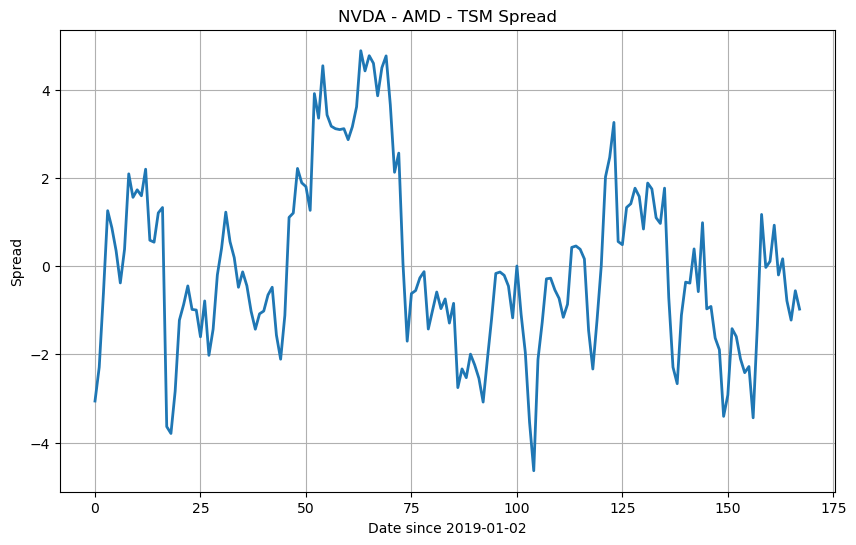

In [105]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.plot(combined_spread['in-sample'],linewidth=2)
plt.xlabel('Date since ' + str(combined_data['Date'][0])[:10])
plt.ylabel('Spread')
plt.title('NVDA - AMD - TSM Spread')

In [106]:
combined_mean = combined_spread['in-sample'].mean()
combined_std = combined_spread['in-sample'].std()

# Find indices where spread crosses mean and mean ± std

combined_std_up = ((combined_spread['in-sample'].shift(1) < combined_mean + combined_std) & 
                (combined_spread['in-sample'] >= combined_mean + combined_std))

# Crossing below mean - std_dev (potential buy signal)
combined_std_down = ((combined_spread['in-sample'].shift(1) > combined_mean - combined_std) & 
                  (combined_spread['in-sample'] <= combined_mean - combined_std))

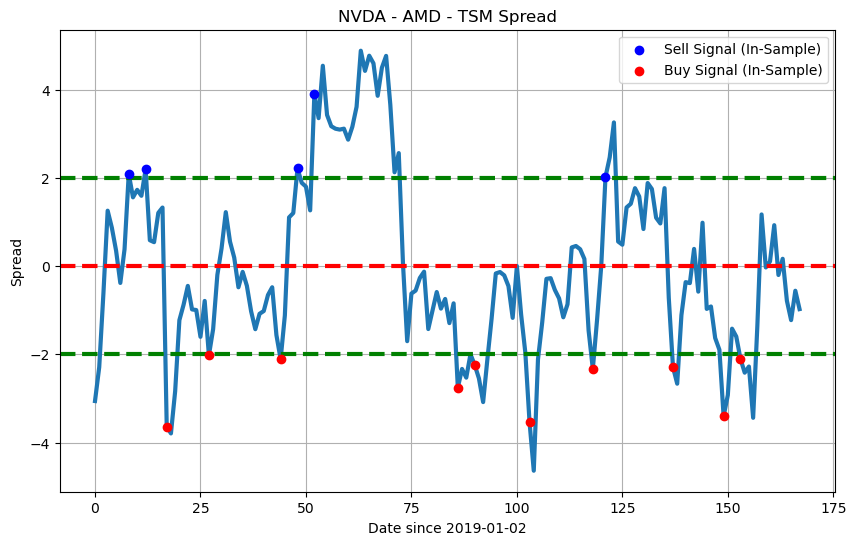

In [107]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.plot(combined_spread['in-sample'],linewidth=3)
plt.axhline(combined_spread['in-sample'].mean(), ls = '--', color='r',linewidth=3)
plt.axhline(combined_spread['in-sample'].mean() + combined_spread['in-sample'].std(), ls = '--', color='g',linewidth=3)
plt.axhline(combined_spread['in-sample'].mean() - combined_spread['in-sample'].std(), ls = '--', color='g',linewidth=3)


plt.scatter(combined_spread.index[combined_std_up], combined_spread['in-sample'][combined_std_up], color='blue', label='Sell Signal (In-Sample)', zorder=5)
plt.scatter(combined_spread.index[combined_std_down], combined_spread['in-sample'][combined_std_down], color='red', label='Buy Signal (In-Sample)', zorder=5)
plt.ylabel('Spread')
plt.title('NVDA - AMD - TSM Spread')
plt.xlabel('Date since ' + str(combined_data['Date'][0])[:10])
plt.legend()

### In-Sample Performance

In [108]:
combined_spread_test = combined_spread[combined_spread['Date'] <= '2019-03-31']
combined_spread_test.head()

,in-sample,Date
0,-3.059676,2019-01-02
1,-2.291181,2019-01-03
2,-0.608756,2019-01-04
3,1.256847,2019-01-07
4,0.868394,2019-01-08


In [109]:
# Assume the intital number of shares = 10
# One sell signal/buy signal indicates sell/buy 1 share
# The trading period is 3 months

# The trading signals
combined_sell_signal = combined_spread_test['in-sample'][combined_std_up].index  # selling signal
combined_buy_signal = combined_spread_test['in-sample'][combined_std_down].index # buying signal

# Acutal NVDA price 
combined_NVDA_sell = combined_data['NVDA'].iloc[combined_sell_signal]
combined_NVDA_sell = combined_NVDA_sell.to_numpy()

combined_NVDA_buy = combined_data['NVDA'].iloc[combined_buy_signal]
combined_NVDA_buy = combined_NVDA_buy.to_numpy()

# Beginning price of NVDA
combined_NVDA_beginning = combined_data['NVDA'].iloc[0]

# End price of NVDA
combined_NVDA_end = combined_data[combined_data['Date'] <= '2019-03-31']['NVDA'].iloc[-1]

# Calculate the return from 1/1 to 3/31
combined_return = 0
stock = 10
if combined_NVDA_buy.size > 0:
    for i in combined_NVDA_buy:
        combined_return += combined_NVDA_beginning - i
        stock += 1
if combined_NVDA_sell.size > 0:   
    for i in combined_NVDA_sell:
        combined_return += i - combined_NVDA_beginning
        stock -= 1

combined_return += stock * (combined_NVDA_end - combined_NVDA_beginning)
print('In-Sample Extended Pair Strategy Return: ', combined_return)
print('buy signal: ', combined_buy_signal.values)
print('sell signal: ', combined_sell_signal.values)
print('buy price: ', combined_NVDA_sell)
print('sell price: ', combined_NVDA_buy)

In-Sample Extended Pair Strategy Return:  117.95499420166016
buy signal:  [17 27 44]
sell signal:  [ 8 12 48 52]
buy price:  [37.61000061 39.23249817 42.15499878 43.92750168]
sell price:  [34.50249863 36.61249924 37.31499863]


### Test Extened Pair Strategy (out of sample)

In [110]:
TSM_oos = yf.download('TSM', start_oos , end_oos)

TSM_oos = TSM_oos.reset_index()
TSM_oos = TSM_oos[['Date','Close']]
TSM_oos.columns = ['Date','TSM']

[*********************100%%**********************]  1 of 1 completed


In [111]:
combined_data_oos = pd.merge(pair_data_oos, TSM_oos, on='Date')
combined_data_oos.head()

,Date,NVDA,AMD,TSM
0,2019-09-03,41.042500,30.900000,41.720001
1,2019-09-04,42.189999,30.950001,43.150002
2,2019-09-05,44.935001,31.500000,44.240002
3,2019-09-06,44.662498,30.559999,43.709999
4,2019-09-09,45.125000,30.500000,43.849998


In [112]:
combined_oos_spread = pd.DataFrame(combined_data_oos[tickers[1]] - beta_1[0] * combined_data_oos[tickers[0]] - beta_1[1] * combined_data_oos[tickers[2]] - beta_1[2])
combined_oos_spread.columns = ['out-sample']

In [113]:
combined_spread_oos_index = len(combined_spread) +np.cumsum(np.ones(combined_oos_spread.shape[0]))-1

In [114]:
# Reset combined_data_oos index
combined_data_oos.index = combined_spread_oos_index

In [115]:
combined_oos_std_up = ((combined_oos_spread['out-sample'].shift(1) < combined_mean + combined_std) & 
                (combined_oos_spread['out-sample'] > combined_mean + combined_std))

combined_oos_std_down = ((combined_oos_spread['out-sample'].shift(1) > combined_mean - combined_std) & 
                  (combined_oos_spread['out-sample'] < combined_mean - combined_std))

Text(0.5, 0, 'Date since 2019-01-02')

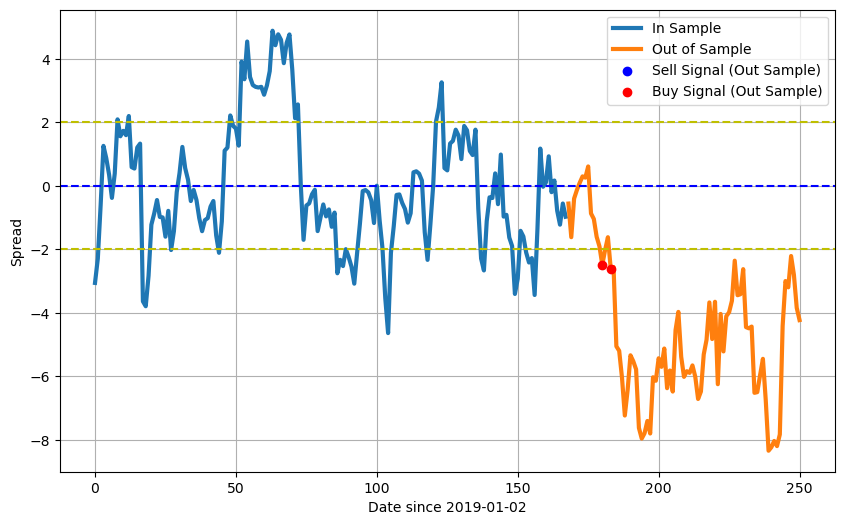

In [116]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.grid(which='minor', linestyle=':', linewidth='0.5')

plt.plot(combined_spread['in-sample'],linewidth=3,label='In Sample')
plt.plot(combined_spread_oos_index, combined_oos_spread,label='Out of Sample',linewidth=3)
plt.axhline(combined_spread['in-sample'].mean(), ls = '--', color='b');
plt.axhline(combined_spread['in-sample'].mean() + combined_spread['in-sample'].std(), ls = '--', color='y');
plt.axhline(combined_spread['in-sample'].mean() - combined_spread['in-sample'].std(), ls = '--', color='y');

plt.scatter(combined_spread_oos_index[combined_oos_std_up], combined_oos_spread['out-sample'][combined_oos_std_up], color='blue', label='Sell Signal (Out Sample)', zorder=5)
plt.scatter(combined_spread_oos_index[combined_oos_std_down], combined_oos_spread['out-sample'][combined_oos_std_down], color='red', label='Buy Signal (Out Sample)', zorder=5)

plt.legend()
plt.ylabel('Spread')
plt.xlabel('Date since ' + str(combined_data['Date'][0])[:10])

### Out-Sample Performance

In [117]:
# Assume the intital number of shares = 10
# One sell signal/buy signal indicates sell/buy 1 share
# The trading period is 3 months

# The trading signals
combined_oos_sell_signal = combined_spread_oos_index[combined_oos_std_up] # no selling signal
combined_oos_buy_signal = combined_spread_oos_index[combined_oos_std_down] # buying signal


# Acutal NVDA price 
combined_oos_NVDA_buy = combined_data_oos['NVDA'][combined_oos_buy_signal]
combined_oos_NVDA_buy = combined_oos_NVDA_buy.to_numpy()

combined_oos_NVDA_sell = combined_data_oos['NVDA'][combined_oos_sell_signal]
combined_oos_NVDA_sell = combined_oos_NVDA_sell.to_numpy()

# Beginning price of NVDA
combined_oos_NVDA_beginning = combined_data_oos['NVDA'].iloc[0]

# End price of NVDA
combined_oos_NVDA_end = combined_data_oos['NVDA'].iloc[-1]

# Calculate the return from 9/1 to 12/31
combined_oos_return = 0
stock = 10

# Sell stocks
if combined_oos_NVDA_sell.size > 0:
    for i in combined_oos_NVDA_buy:
        combined_oos_return += i - combined_oos_NVDA_beginning
        stock -= 1
    
# Buy stocks
if combined_oos_NVDA_buy.size > 0:
    for i in combined_oos_NVDA_buy:
        combined_oos_return += combined_oos_NVDA_beginning - i
        stock += 1

combined_oos_return += stock * (combined_oos_NVDA_end - combined_oos_NVDA_beginning)
print('Out-Sample Extended Pair Strategy Return: ', combined_oos_return)
print('buy signal: ', combined_oos_buy_signal)
print('sell signal: ', combined_oos_sell_signal)
print('buy price: ', combined_oos_NVDA_buy)
print('sell price: ', combined_oos_NVDA_sell)

Out-Sample Extended Pair Strategy Return:  199.1675262451172
buy signal:  [180. 183.]
sell signal:  []
buy price:  [44.23500061 43.13249969]
sell price:  []
